In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('customer_data.csv')

# Inspect the dataset
print("Shape:", df.shape)
print("Columns:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nSummary Statistics:\n", df.describe())


Shape: (305, 4)
Columns:
 Index(['Customer ID', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

Data Types:
 Customer ID         int64
Age               float64
Annual Income     float64
Spending Score    float64
dtype: object

Missing Values:
 Customer ID        0
Age               20
Annual Income     20
Spending Score    20
dtype: int64

Duplicates: 5

Summary Statistics:
        Customer ID         Age  Annual Income  Spending Score
count   305.000000  285.000000     285.000000      285.000000
mean   1149.878689   43.536842   56979.442105       49.431579
std      86.850683   15.245972   24293.732447       29.030091
min    1000.000000   18.000000   15301.000000        1.000000
25%    1075.000000   31.000000   34830.000000       25.000000
50%    1151.000000   44.000000   59078.000000       50.000000
75%    1225.000000   56.000000   76389.000000       75.000000
max    1299.000000   69.000000   99664.000000       99.000000


In [6]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['Age', 'Annual Income', 'Spending Score']]

# Drop rows with missing values
X = X.dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

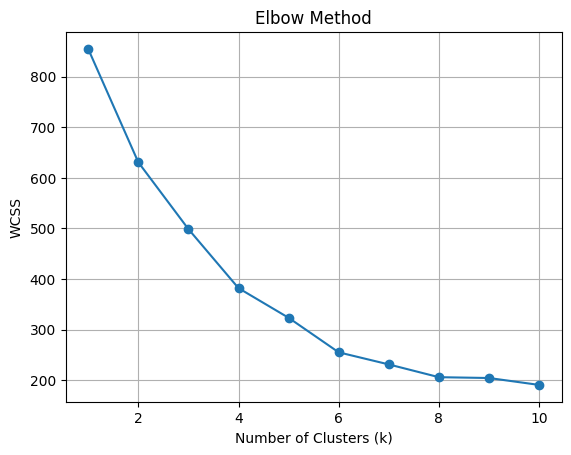

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [8]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score for k={k}: {score:.3f}')


Silhouette Score for k=2: 0.251
Silhouette Score for k=3: 0.251
Silhouette Score for k=4: 0.292
Silhouette Score for k=5: 0.279
Silhouette Score for k=6: 0.311
Silhouette Score for k=7: 0.293
Silhouette Score for k=8: 0.295
Silhouette Score for k=9: 0.261
Silhouette Score for k=10: 0.255


In [11]:
# Final clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Create a new DataFrame with scaled data and cluster labels
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df['Cluster'] = cluster_labels

# Merge cluster labels with the original DataFrame
df = df.merge(X_scaled_df[['Cluster']], left_index=True, right_index=True, how='left')

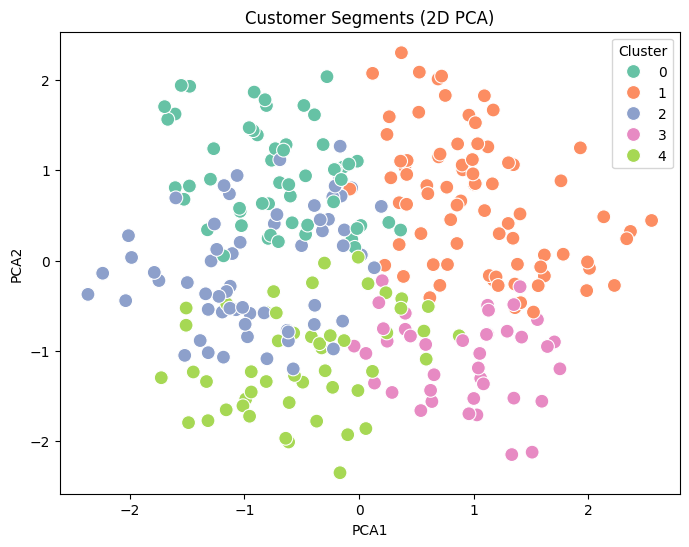

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with PCA results
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'], index=X.index)

# Merge PCA results with the cluster labels
plot_df = X_pca_df.merge(X_scaled_df[['Cluster']], left_index=True, right_index=True, how='left')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (2D PCA)')
plt.show()

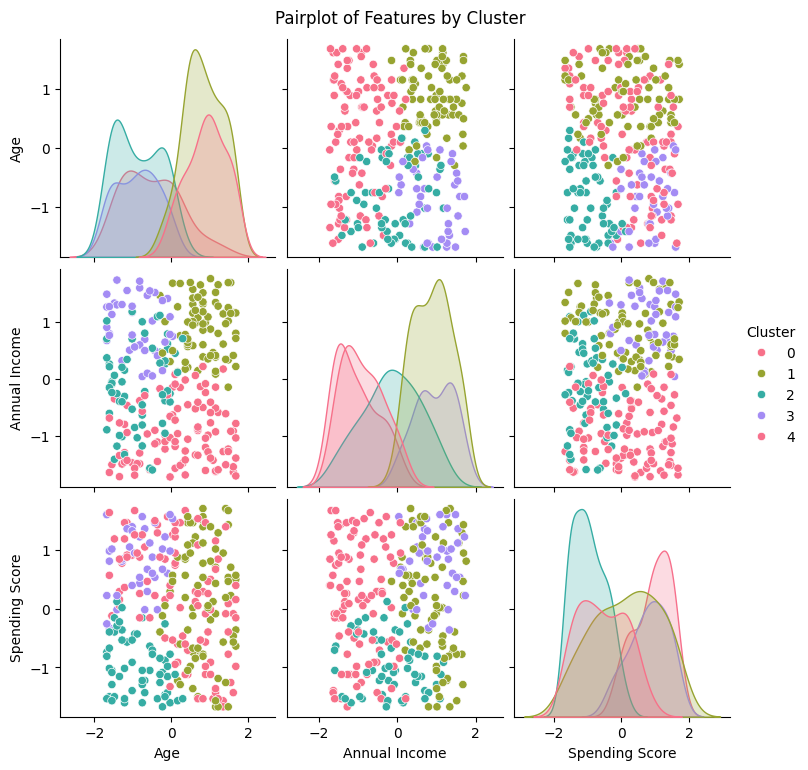

In [17]:
sns.pairplot(X_scaled_df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], hue='Cluster', palette='husl')
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()